In [109]:
import pandas as pd

from sklearn.model_selection import train_test_split
import numpy as np

In [110]:
hhaFile='../datasets/Medicare_Home_Health_Agency Data 2013-2016 - clean1.csv'
hha_df = pd.read_csv(hhaFile)
hha_df.head()

,Year,Provider ID,Agency Name,Street Address,City,State,Zip Code,Total Episodes (non-LUPA),Distinct Beneficiaries (non-LUPA),Average Number of Total Visits Per Episode (non-LUPA),...,Percent of Beneficiaries with Chronic Kidney Disease,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,2016,17008,JEFFERSON COUNTY HOME CARE,2201 ARLINGTON AVENUE,BESSEMER,AL,35020,133,54.0,11.6,...,0.4444,0.1667,0.1852,0.5741,0.4444,0.2963,0.0000,0.4815,0.2778,0.0741
1,2016,17009,ALACARE HOME HEALTH & HOSPICE,2970 LORNA ROAD,BIRMINGHAM,AL,35216,12879,6616.0,18.9,...,0.5494,0.3832,0.3939,0.4512,0.6743,0.5644,0.1329,0.6463,0.0523,0.1276
2,2016,17013,GENTIVA HEALTH SERVICES,1239 RUCKER BLVD,ENTERPRISE,AL,36330,1236,612.0,23.4,...,0.4641,0.3252,0.3824,0.4526,0.6618,0.5114,0.1650,0.6716,0.0523,0.1275
3,2016,17014,AMEDISYS HOME HEALTH,68278 MAIN STREET,BLOUNTSVILLE,AL,35031,685,403.0,21.4,...,0.5236,0.3648,0.4690,0.4442,0.6079,0.5459,0.1290,0.6725,0.0869,0.1737
4,2016,17016,SOUTHEAST ALABAMA HOMECARE,804 GLOVER AVENUE,ENTERPRISE,AL,36330,685,362.0,15.5,...,0.5414,0.4033,0.3591,0.5249,0.6934,0.5829,0.1492,0.6077,0.0525,0.1519


In [111]:
hha_df.count().head()
#count 42,573

Year              42573
Provider ID       42573
Agency Name       42573
Street Address    42573
City              42573
dtype: int64

In [112]:
hha_df.columns[hha_df.columns.str.contains('hcc',case=False)]

Index(['Average HCC Score'], dtype='object')

In [113]:
hha_df['Average HCC Score'].describe()

count    42573.000000
mean         2.245639
std          0.465403
min          0.740000
25%          1.950000
50%          2.190000
75%          2.470000
max          8.200000
Name: Average HCC Score, dtype: float64

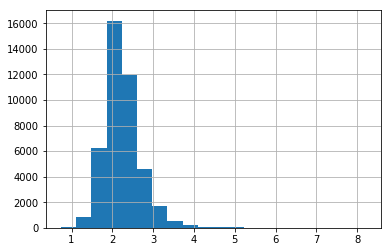

In [197]:
%matplotlib inline
hha_df['Average HCC Score'].hist(bins=20)

In [198]:
hha_df['Average HCC Score'].describe()

count    42573.000000
mean         2.245639
std          0.465403
min          0.740000
25%          1.950000
50%          2.190000
75%          2.470000
max          8.200000
Name: Average HCC Score, dtype: float64

In [206]:
sum(hha_df['Average HCC Score'] >= 1.08)

42523

In [114]:
#take a look at cleaner csv
cleaner_hha_df='../datasets/cleaner_hha_df.csv'
cleaner_hha_df = pd.read_csv(cleaner_hha_df)
cleaner_hha_df.head()

,Unnamed: 0,Year,Provider ID,Agency Name,Street Address,City,State,Zip Code,Total Episodes (non-LUPA),Distinct Beneficiaries (non-LUPA),...,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke,risk_categorical
0,0,2016,17008,0,0,BESSEMER,AL,35020,133,54.0,...,0.1667,0.1852,0.5741,0.4444,0.2963,0.0000,0.4815,0.2778,0.0741,2
1,1,2016,17009,0,0,BIRMINGHAM,AL,35216,12879,6616.0,...,0.3832,0.3939,0.4512,0.6743,0.5644,0.1329,0.6463,0.0523,0.1276,2
2,2,2016,17013,0,0,ENTERPRISE,AL,36330,1236,612.0,...,0.3252,0.3824,0.4526,0.6618,0.5114,0.1650,0.6716,0.0523,0.1275,2
3,3,2016,17014,0,0,BLOUNTSVILLE,AL,35031,685,403.0,...,0.3648,0.4690,0.4442,0.6079,0.5459,0.1290,0.6725,0.0869,0.1737,2
4,4,2016,17016,0,0,ENTERPRISE,AL,36330,685,362.0,...,0.4033,0.3591,0.5249,0.6934,0.5829,0.1492,0.6077,0.0525,0.1519,2


In [202]:
cleaner_hha_df['Average HCC Score'].head()

0    2.28
1    2.26
2    1.98
3    2.18
4    2.01
Name: Average HCC Score, dtype: float64

In [204]:
# Split the data into features and target label
risk_raw = cleaner_hha_df['risk_categorical']
features_raw = cleaner_hha_df.drop(['Average HCC Score', 'risk_categorical', 'Provider ID', 'Agency Name', 'Street Address',\
                                    'City', 'State',], axis = 1)

real_hcc=cleaner_hha_df['Average HCC Score']

In [116]:
features_raw.head()

,Unnamed: 0,Year,Zip Code,Total Episodes (non-LUPA),Distinct Beneficiaries (non-LUPA),Average Number of Total Visits Per Episode (non-LUPA),Average Number of Skilled Nursing Visits Per Episode (non-LUPA),Average Number of PT Visits Per Episode (non-LUPA),Average Number of OT Visits Per Episode (non-LUPA),Average Number of ST Visits Per Episode (non-LUPA),...,Percent of Beneficiaries with Chronic Kidney Disease,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,0,2016,35020,133,54.0,11.6,7.4,2.1,0.0,0.0,...,0.4444,0.1667,0.1852,0.5741,0.4444,0.2963,0.0000,0.4815,0.2778,0.0741
1,1,2016,35216,12879,6616.0,18.9,9.2,4.9,1.1,0.3,...,0.5494,0.3832,0.3939,0.4512,0.6743,0.5644,0.1329,0.6463,0.0523,0.1276
2,2,2016,36330,1236,612.0,23.4,8.5,6.6,3.8,0.5,...,0.4641,0.3252,0.3824,0.4526,0.6618,0.5114,0.1650,0.6716,0.0523,0.1275
3,3,2016,35031,685,403.0,21.4,8.2,6.6,3.1,1.3,...,0.5236,0.3648,0.4690,0.4442,0.6079,0.5459,0.1290,0.6725,0.0869,0.1737
4,4,2016,36330,685,362.0,15.5,8.5,4.2,2.4,0.2,...,0.5414,0.4033,0.3591,0.5249,0.6934,0.5829,0.1492,0.6077,0.0525,0.1519


In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(
    features_raw,
    risk_raw, 
    test_size=0.2,
    random_state=1)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 33140 samples.
Testing set has 8286 samples.


## Data preprocessing
need to scale data before using multilayer perceptron models
without scaling it can be difficult for the training cycle to converge

In [119]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [120]:
# need to scale training and testing data


In [121]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### do we need one-hot encoding


In [122]:
# example
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [123]:
#model
#numerical then regressor
#categorical then classifier

In [180]:
from keras.models import Sequential
model = Sequential()

In [181]:
#add first layer or input
from keras.layers import Dense
#? input 6x2 in middle
model.add(Dense(units=10,activation='relu',input_dim=39))
model.add(Dense(units=10, activation='relu'))

In [182]:
#final layer output, usually softmax for classification and number of classes trying to predict
# 2 output
model.add(Dense(units=3, activation='softmax'))

In [183]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                400       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 33        
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


In [184]:
#compile model with loss and optimizer and accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [205]:
#train; will update wts with optimizer and loss; epochs=iterations; shuffle? choose details printed
model.fit(
    X_train_scaled, 
    y_train_categorical, 
    epochs=100,
    shuffle=True,
    verbose=2)

Epoch 1/100
 - 2s - loss: 6.9029e-04 - acc: 0.9999
Epoch 2/100
 - 2s - loss: 5.5501e-04 - acc: 0.9999
Epoch 3/100
 - 2s - loss: 5.6804e-04 - acc: 0.9999
Epoch 4/100
 - 2s - loss: 9.9692e-04 - acc: 0.9998
Epoch 5/100
 - 2s - loss: 5.6084e-04 - acc: 0.9999
Epoch 6/100
 - 2s - loss: 8.7221e-04 - acc: 0.9998
Epoch 7/100
 - 2s - loss: 9.3059e-04 - acc: 0.9997
Epoch 8/100
 - 2s - loss: 5.2230e-04 - acc: 1.0000
Epoch 9/100
 - 2s - loss: 5.1653e-04 - acc: 1.0000
Epoch 10/100
 - 2s - loss: 5.0754e-04 - acc: 1.0000
Epoch 11/100
 - 2s - loss: 5.0677e-04 - acc: 1.0000
Epoch 12/100
 - 2s - loss: 9.8005e-04 - acc: 0.9998
Epoch 13/100
 - 2s - loss: 7.5096e-04 - acc: 0.9999
Epoch 14/100
 - 2s - loss: 5.0752e-04 - acc: 1.0000
Epoch 15/100
 - 2s - loss: 5.0317e-04 - acc: 1.0000
Epoch 16/100
 - 2s - loss: 5.0170e-04 - acc: 1.0000
Epoch 17/100
 - 2s - loss: 5.0213e-04 - acc: 1.0000
Epoch 18/100
 - 2s - loss: 5.4177e-04 - acc: 0.9999
Epoch 19/100
 - 2s - loss: 0.0013 - acc: 0.9997
Epoch 20/100
 - 2s - loss

In [186]:
len(X_train_scaled[0])
len(y_train_categorical[0])

3

In [187]:
len(X_train_scaled)
y_train_categorical[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [188]:
#quantify; use test data to validate model; ability to predict new data points
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, 
    y_test_categorical, 
    verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')


Loss: 0.013219614123981344, Accuracy: 0.998189717595945


In [189]:
preds = model.predict_classes(X_test_scaled)

In [191]:
preds

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.36      0.45      0.40        11
          2       1.00      1.00      1.00      8275

avg / total       1.00      1.00      1.00      8286



In [207]:
#make predications
#somedata=
print(f'Predicted class: {model.predict_classes(new_data)}')

NameError: name 'new_data' is not defined